## Review WEIS CSV Files

In [1]:
# Load all the tools
import numpy as np

from weis.aeroelasticse import FileTools

import pandas as pd


import matplotlib.pyplot as plt

import openmdao.api as om

import matplotlib
# font = {
# #         'family' : 'normal',
# #         'weight' : 'bold',
#         'size'   : 14
#        }

# matplotlib.rc('font', **font)



/Users/dzalkind/opt/anaconda3/envs/weis-env4/lib/python3.8/site-packages/openmdao/utils/general_utils.py:121: OMDeprecationWarning:simple_warning is deprecated.  Use openmdao.warnings.issue_warning instead.
/Users/dzalkind/opt/anaconda3/envs/weis-env4/lib/python3.8/site-packages/openmdao/utils/notebook_utils.py:154: UserWarning:Tabulate is not installed. Run `pip install openmdao[notebooks]` to install required dependencies. Using ASCII for outputs.


In [2]:
# Output from examples/06_IEA-15-240-RWT/weis_driver_umaine_semi.py
turb = pd.read_csv('outputs/refturb_output_06_IEA-15-240-RWT.csv')

In [3]:
turb

,variables,units,values,description
0,materials.rho_fiber,kg/m**3,[ 0. 0. 0. 0. 2535.5 1800. 253...,1D array of the density of the fibers of the m...
1,materials.rho,kg/m**3,[1235. 7800. 7850. 7200. 1940. 1220. 1940. 194...,1D array of the density of the materials. For ...
2,materials.rho_area_dry,kg/m**2,[0. 0. 0. 0. 7...,1D array of the dry aerial density of the comp...
3,materials.ply_t_from_yaml,m,[0.0005 0. 0. 0. 0...,1D array of the ply thicknesses of the materia...
4,materials.fvf_from_yaml,NaN,[0. 0. 0. 0. 0...,1D array of the non-dimensional fiber volume f...
...,...,...,...,...
5469,financese_post.bcr,NaN,[0.69615335],Benefit cost ratio: BCR is the discounted sum ...
5470,financese_post.cbr,NaN,[1.43646512],Cost benefit ratio: CBR is the inverse of BCR....
5471,financese_post.roi,NaN,[-0.30384665],Return on investment: ROI can also be expresse...
5472,financese_post.pm,NaN,[-0.43646512],Profit margin: PM can also be expressed as 1 -...


In [4]:
# Compare Outputs

In [5]:
comp_files = [
    'outputs/refturb_output_06_IEA-15-240-RWT.csv', # generated from examples/06_IEA-15-240-RWT/weis_driver_umaine_semi.py
    'outputs/refturb_output_04_NREL5MW_OC4_semi.csv', # generated from examples/04_NREL5MW_OC4_semi/weis_driver.py
    
]

# only works on single values for now
comp_values = [
    'floatingse.platform_mass',
    'financese.bos_per_kW',
    'financese_post.plant_aep',
    'financese_post.lcoe',
]

comp = {}
for value in comp_values:
    comp[value] = []

turbs = []

for file in comp_files:
    turb = pd.read_csv(file)
    turbs.append(turb)
    
    
    
    for value in comp_values:
        i_val = turb.variables == value
        a = turb[i_val]['values'].to_numpy()
        val = float(a[0][1:-1])
        comp[value].append(val)
    
    

In [6]:
comp

{'floatingse.platform_mass': [14993921.38555897, 13541229.23679673],
 'financese.bos_per_kW': [4053.0, 2979.0],
 'financese_post.plant_aep': [2652969110.0, 2613022240.0],
 'financese_post.lcoe': [0.09644341, 0.09656956]}

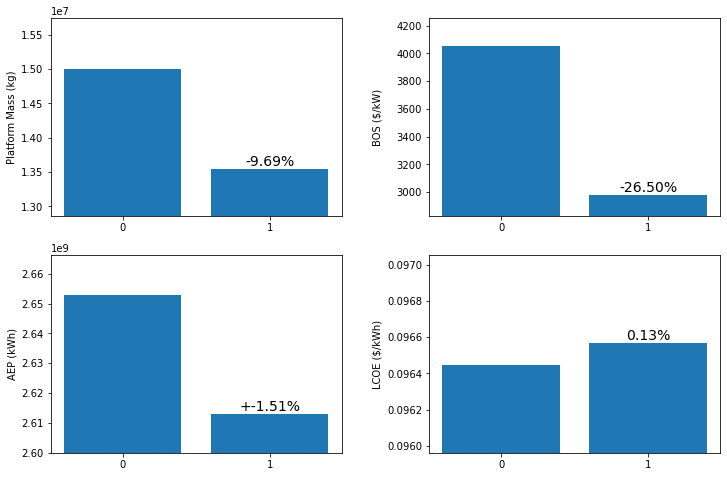

In [7]:
# Some plots I made a while back

x = np.arange(2)

lcoe_perc = 100* (np.array(comp['financese_post.lcoe'])/comp['financese_post.lcoe'][0] - 1)
ptfm_perc = 100* (np.array(comp['floatingse.platform_mass'])/comp['floatingse.platform_mass'][0] - 1)
bos_perc = 100* (np.array(comp['financese.bos_per_kW'])/comp['financese.bos_per_kW'][0] - 1)
aep_perc = 100* (np.array(comp['financese_post.plant_aep'])/comp['financese_post.plant_aep'][0] - 1)


lcoe =np.array(comp['financese_post.lcoe'])
ptfm =np.array(comp['floatingse.platform_mass'])
bos =np.array(comp['financese.bos_per_kW'])
aep =np.array(comp['financese_post.plant_aep'])

comp['financese_post.lcoe'][0]


fig, axs = plt.subplots(2,2)
# [a.grid() for a in axs.flatten()]

buf = 0.05
axs[0,0].set_ylabel('Platform Mass (kg)')
axs[0,0].bar(x,ptfm)
axs[0,0].set_ylim([ptfm.min()*(1-buf),ptfm.max()*(1+buf)])

for i,p in enumerate(axs[0,0].patches[1:]):
    if p.get_height() > 0:
        va = 'bottom'
    else:
        va = 'top'
    axs[0,0].annotate(f'{ptfm_perc[i+1]:0.2f}%', (p.get_x()+p.get_width()/2, p.get_height()), fontsize=14, ha='center', va=va)



axs[0,1].set_ylabel('BOS ($/kW)')
axs[0,1].bar(x,bos)
axs[0,1].set_ylim([bos.min()*(1-buf),bos.max()*(1+buf)])

for i,p in enumerate(axs[0,1].patches[1:]):
    if p.get_height() > 0:
        va = 'bottom'
    else:
        va = 'top'
    axs[0,1].annotate(f'{bos_perc[i+1]:0.2f}%', (p.get_x()+p.get_width()/2, p.get_height()), fontsize=14, ha='center', va=va)

    

buf = 0.005
axs[1,0].set_ylabel('AEP (kWh)')
axs[1,0].bar(x,aep)
axs[1,0].set_ylim([aep.min()*(1-buf),aep.max()*(1+buf)])

for i,p in enumerate(axs[1,0].patches[1:]):
    if p.get_height() > 0:
        va = 'bottom'
    else:
        va = 'top'
    axs[1,0].annotate(f'+{aep_perc[i+1]:0.2f}%', (p.get_x()+p.get_width()/2, p.get_height()), fontsize=14, ha='center', va=va)



axs[1,1].set_ylabel('LCOE ($/kWh)')
axs[1,1].bar(x,lcoe)
axs[1,1].set_ylim([lcoe.min()*(1-buf),lcoe.max()*(1+buf)])

for i,p in enumerate(axs[1,1].patches[1:]):
    if p.get_height() > 0:
        va = 'bottom'
    else:
        va = 'top'
    axs[1,1].annotate(f'{lcoe_perc[i+1]:0.2f}%', (p.get_x()+p.get_width()/2, p.get_height()), fontsize=14, ha='center', va=va)

    


[a.set_xticks(x) for a in axs.flatten()]
# [a.set_xticklabels(['Init.','Level 1','Level 2','Level 3']) for a in axs.flatten()]
# axs[1,1].set_xticks(x)
# axs[1,1].set_xticklabels(['Init','Level 1','Level 2','Level 3'])


fig.set_size_inches(12,8)

plt.subplots_adjust(wspace=.3)

fig.align_ylabels()



# plt.bar(x,comp['financese_post.lcoe']/comp['financese_post.lcoe'][0])